In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/CSC532/dataset/dataset1.zip"


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
 extracting: dataset1/train/sad/Sad-370.jpg  
 extracting: dataset1/train/sad/Sad-3700.jpg  
 extracting: dataset1/train/sad/Sad-3701.jpg  
 extracting: dataset1/train/sad/Sad-3702.jpg  
 extracting: dataset1/train/sad/Sad-3703.jpg  
 extracting: dataset1/train/sad/Sad-3704.jpg  
 extracting: dataset1/train/sad/Sad-3705.jpg  
 extracting: dataset1/train/sad/Sad-3706.jpg  
 extracting: dataset1/train/sad/Sad-3707.jpg  
 extracting: dataset1/train/sad/Sad-3708.jpg  
 extracting: dataset1/train/sad/Sad-3709.jpg  
 extracting: dataset1/train/sad/Sad-371.jpg  
 extracting: dataset1/train/sad/Sad-3710.jpg  
 extracting: dataset1/train/sad/Sad-3711.jpg  
 extracting: dataset1/train/sad/Sad-3712.jpg  
 extracting: dataset1/train/sad/Sad-3713.jpg  
 extracting: dataset1/train/sad/Sad-3714.jpg  
 extracting: dataset1/train/sad/Sad-3715.jpg  
 extracting: dataset1/train/sad/Sad-3716.jpg  
 extracting: dataset1/train/sad/Sad-3717.jpg  
 extr

In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/dataset1/train'
val_dir = '/content/dataset1/test'
train_datagen = ImageDataGenerator(
    rescale=1./255
    )
val_datagen = ImageDataGenerator(
    rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


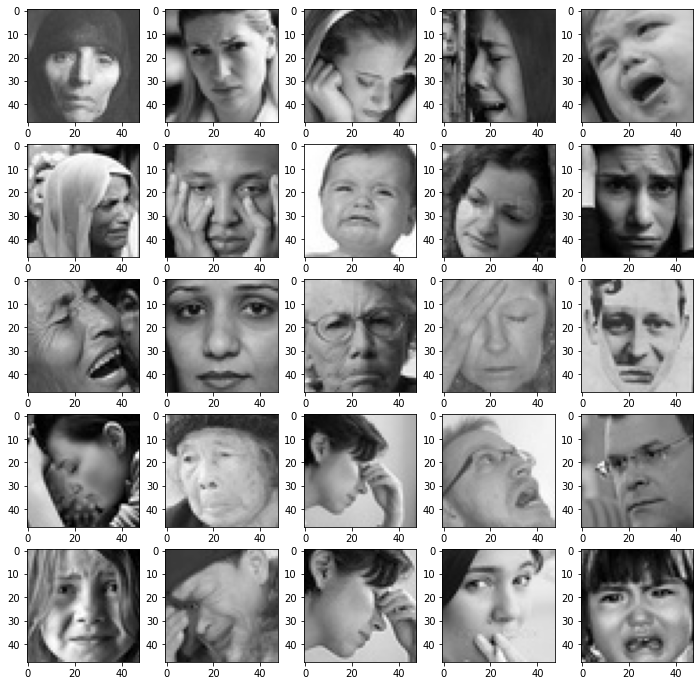

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
face_expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 26, 1):
    plt.subplot(5,5,i)
    img = load_img(train_dir+"/"+face_expression+"/"+
                  os.listdir(train_dir + "/" + face_expression)[i], target_size=(48,48))
    plt.imshow(img)   
plt.show()

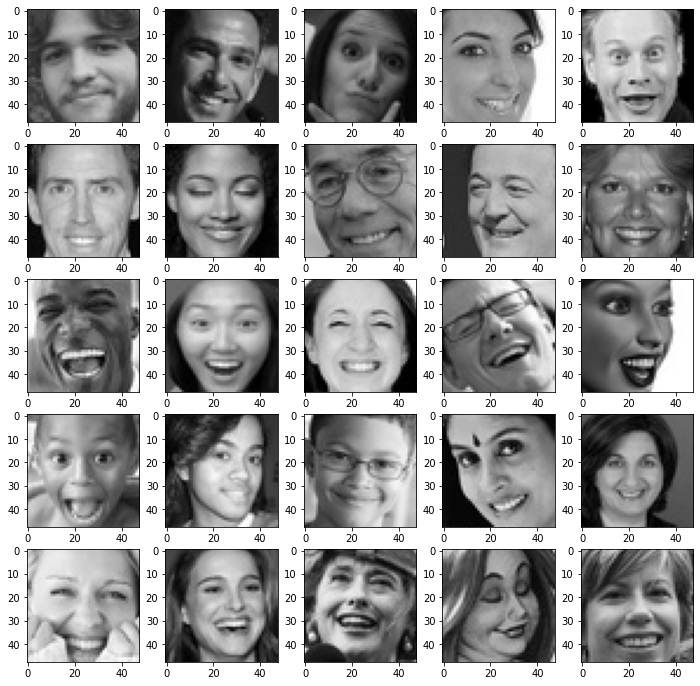

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
face_expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 26, 1):
    plt.subplot(5,5,i)
    img = load_img(train_dir+"/"+face_expression+"/"+
                  os.listdir(train_dir + "/" + face_expression)[i], target_size=(48,48))
    plt.imshow(img)   
plt.show()

In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(6, activation='softmax'))

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
epochs=75

history2 = emotion_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.n/train_generator.batch_size,
    validation_steps=validation_generator.n/validation_generator.batch_size,
)

Epoch 1/75
441/441 [==============================] - 44s 26ms/step - loss: 1.7604 - accuracy: 0.2505 - val_loss: 1.6103 - val_accuracy: 0.3597
Epoch 2/75
441/441 [==============================] - 10s 23ms/step - loss: 1.5744 - accuracy: 0.3751 - val_loss: 1.4472 - val_accuracy: 0.4295
Epoch 3/75
441/441 [==============================] - 10s 23ms/step - loss: 1.4555 - accuracy: 0.4278 - val_loss: 1.3783 - val_accuracy: 0.4679
Epoch 4/75
441/441 [==============================] - 10s 23ms/step - loss: 1.3779 - accuracy: 0.4649 - val_loss: 1.3108 - val_accuracy: 0.4991
Epoch 5/75
441/441 [==============================] - 10s 23ms/step - loss: 1.3133 - accuracy: 0.4914 - val_loss: 1.2715 - val_accuracy: 0.5083
Epoch 6/75
441/441 [==============================] - 10s 24ms/step - loss: 1.2657 - accuracy: 0.5077 - val_loss: 1.2295 - val_accuracy: 0.5244
Epoch 7/75
441/441 [==============================] - 11s 24ms/step - loss: 1.2264 - accuracy: 0.5271 - val_loss: 1.2166 - val_accuracy:

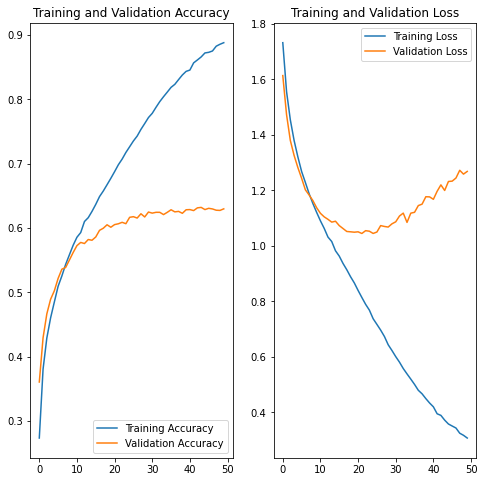

In [ ]:
from matplotlib import pyplot as plt
epochs = 50
def plot_acc_loss(history, epochs):
  acc = history2.history['accuracy']
  val_acc = history2.history['val_accuracy']

  loss = history2.history['loss']
  val_loss = history2.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_acc_loss(history2, epochs)

In [ ]:
emotion_model.save('model2.h5')